In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Load the Iris dataset 

In [2]:
df_iris = sns.load_dataset('iris')

# Let's do a quick visualization

In [96]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


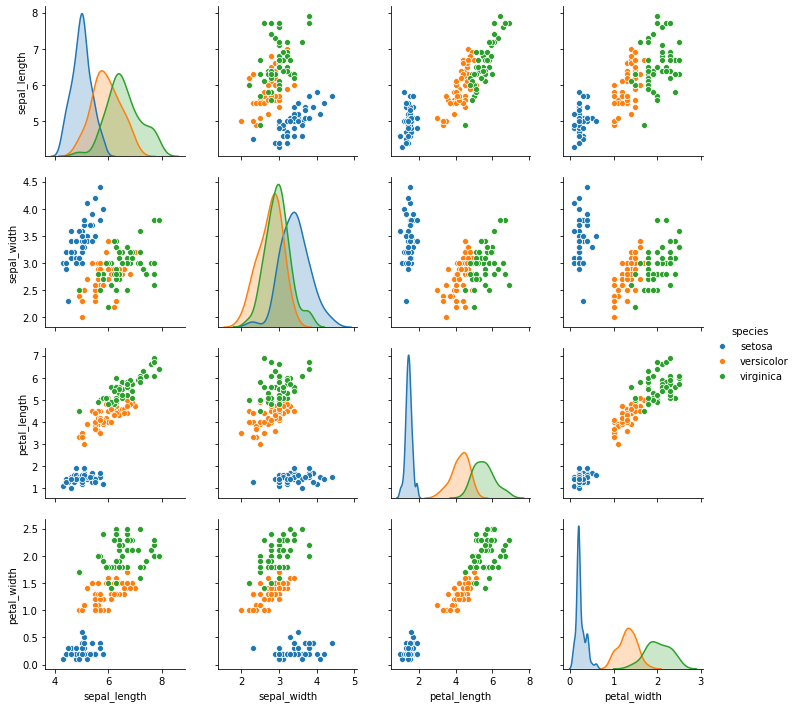

In [97]:
sns.pairplot(df_iris, hue = "species")
plt.show()

# Let's look at some correlations between our variables

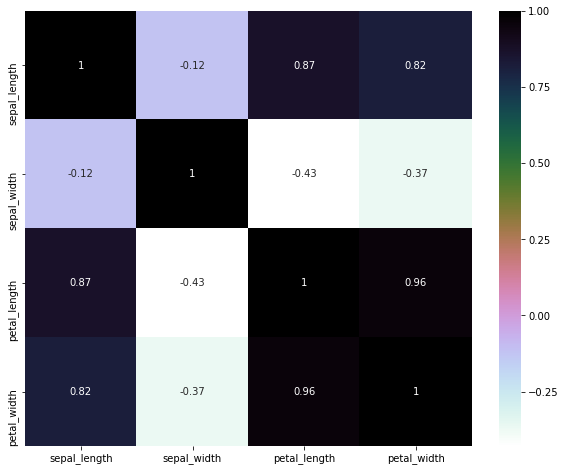

In [3]:
plt.figure(figsize = (10,8))
sns.heatmap(df_iris.corr(), annot = True, cmap = 'cubehelix_r')
plt.show()

## Sepal Length is not correlated with Sepal Width, whereas Petal Length and Petal Width are highly, positively correlated. Petal Width and Sepal Length are also highly, positively correlated.

# Let's create train and test sets and extract features. We will conduct our analyses in three ways: 
# (1) Using all features
# (2) Using Sepal features.
# (3) Using Petal features


In [5]:
train, test = train_test_split(df_iris, test_size = 0.3)
print(train.shape)
print(test.shape)
train.head()

(105, 5)
(45, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
19,5.1,3.8,1.5,0.3,setosa
82,5.8,2.7,3.9,1.2,versicolor
103,6.3,2.9,5.6,1.8,virginica
54,6.5,2.8,4.6,1.5,versicolor


In [6]:
train_x = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
train_y = train.species
test_x = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
test_y = test.species   

# Support Vector Machine
## SVMs are used in this instance as a supervised learning method for classification. A set of hyperplanes, maximizing the margin, is constructed in order to separate points by species, then new points are classified based on location.

In [8]:
from sklearn import svm

model_svm = svm.SVC()
model_svm.fit(train_x, train_y)
predict_svm = model_svm.predict(test_x)
acc_svm = metrics.accuracy_score(predict_svm, test_y)
print("Support Vector Machine Accuracy:", round(acc_svm * 100, 4), "%")

Support Vector Machine Accuracy: 93.3333 %


# Logistic Regression
## Logistic Regression is useful here as a supervised classification algorithm measuring the relationship between the features (petal length, petal width, sepal length, sepal width) and species by estimating probabilities of class membership using the logistic function. 

In [35]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model_lr.fit(train_x, train_y)
predict_lr = model_lr.predict(test_x)
acc_lr = metrics.accuracy_score(predict_lr, test_y)
print("Logistic Regression Accuracy:", round(acc_lr * 100, 4), "%")

Logistic Regression Accuracy: 95.5556 %


# Decision Tree
## A Decision Tree is a non-parametric supervised learning method for, in this case, classification. The goal is to create a model that predicts species by learning decision rules from petal length, petal width, sepal length, and sepal width. 

In [40]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()
model_dtc.fit(train_x, train_y)
predict_dtc = model_dtc.predict(test_x)
acc_dtc = metrics.accuracy_score(predict_dtc, test_y)
print("Decision Tree Accuracy:", round(acc_dtc * 100, 4), "%")

Decision Tree Accuracy: 88.8889 %


# K Nearest Neighbors
## KNN is a supervised classification algorithm used to assign a species to a new data point.  A data point is classified by a plurality vote of its nearest k neighboring points, with the data point being assigned to the ruling species among the k nearest neighbors.

In [41]:

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(train_x, train_y)
predict_knn = model_knn.predict(test_x)
acc_knn = metrics.accuracy_score(predict_knn, test_y)
print("KNN (k = 3) Accuracy:", round(acc_knn * 100, 4), "%")

KNN Accuracy: 95.5556 %


## Let's do cross validation to explore values of k

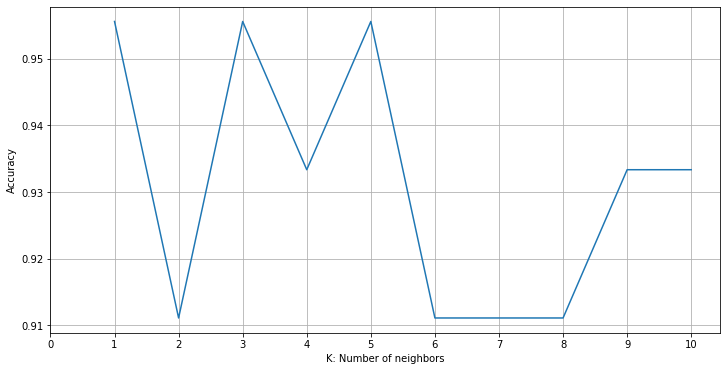

In [42]:
from sklearn import metrics 

index = list(range(1,11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1,11)):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_x, train_y)
    preds = knn.predict(test_x)
    a = a.append(pd.Series(metrics.accuracy_score(preds, test_y)))
    
plt.plot(index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.grid()
plt.xlabel("K: Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

# Let's summarize our results

In [57]:
print("Support Vector Machine Accuracy:", round(acc_svm * 100, 4), "%")
print("Logistic Regression Accuracy:", round(acc_lr * 100, 4), "%")
print("Decision Tree Accuracy:", round(acc_dtc * 100, 4), "%")
print("KNN (k = 3) Accuracy:", round(acc_knn * 100, 4), "%")

Support Vector Machine Accuracy: 93.3333 %
Logistic Regression Accuracy: 95.5556 %
Decision Tree Accuracy: 88.8889 %
KNN (k = 3) Accuracy: 95.5556 %


# Let's do 10-fold Cross Validation on our models

In [59]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

y = df_iris["species"]
x = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] 

kfold = KFold(n_splits = 10) 

mean = []
accuracy = []
std = []

classifiers = ['SVM', 'Logistic Regression', 'Decision Tree', 'KNN']
models = [svm.SVC(), LogisticRegression(solver = 'lbfgs', max_iter = 1000), DecisionTreeClassifier(), 
          KNeighborsClassifier(n_neighbors = 3)]


for i in models:
    model = i
    cv_result = cross_val_score(model, x, y, cv = kfold, scoring = "accuracy")
    cv_result = cv_result
    mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
cv_models_results = pd.DataFrame({'CV Mean':mean,'Std':std},index = classifiers)       
cv_models_results

,CV Mean,Std
SVM,0.933333,0.073030
Logistic Regression,0.946667,0.058119
Decision Tree,0.946667,0.071802
KNN,0.946667,0.065320


# Let's review model accuracy with using a confusion matrix

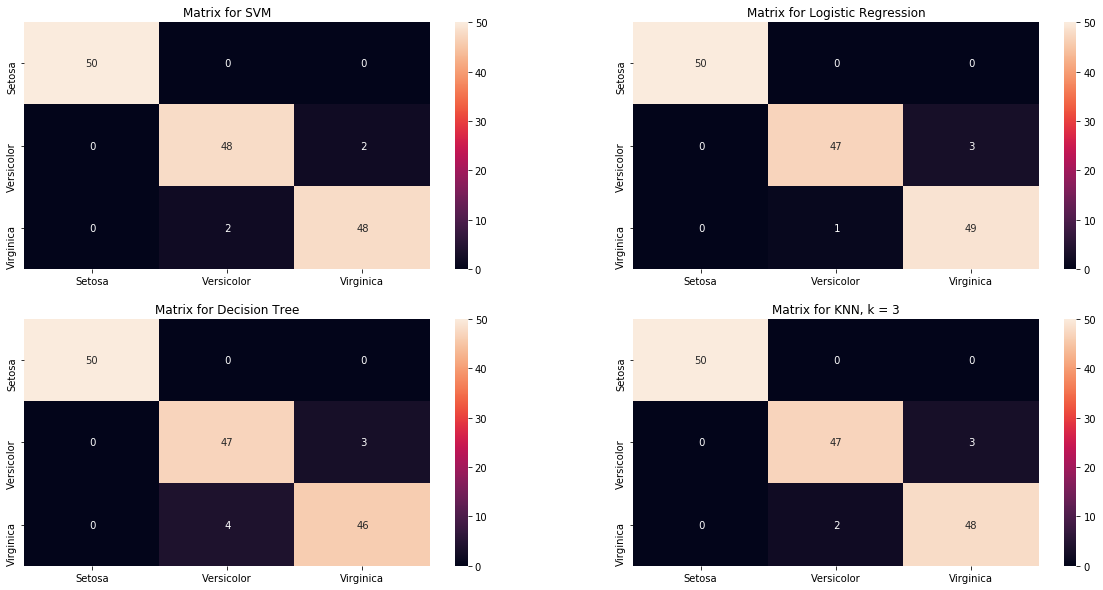

In [65]:
from sklearn.metrics import confusion_matrix 

x_label = ['Setosa', 'Versicolor', 'Virginica']
y_label = ['Setosa', 'Versicolor', 'Virginica']


f, ax = plt.subplots(2,2, figsize = (20, 10))

y_pred1 = cross_val_predict(svm.SVC(), x, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred1), xticklabels = x_label, yticklabels = y_label, 
            ax = ax[0, 0], annot = True, fmt = '2.0f')
ax[0, 0].set_title('Matrix for SVM')

y_pred2 = cross_val_predict(LogisticRegression(solver = 'lbfgs', max_iter = 1000), x, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred2), xticklabels = x_label, yticklabels = y_label, 
            ax = ax[0, 1], annot = True, fmt = '2.0f')
ax[0, 1].set_title('Matrix for Logistic Regression')

y_pred4 = cross_val_predict(DecisionTreeClassifier(), x, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred4), xticklabels = x_label, yticklabels = y_label,
            ax = ax[1, 0], annot = True, fmt = '2.0f')
ax[1, 0].set_title('Matrix for Decision Tree')

y_pred3 = cross_val_predict(KNeighborsClassifier(n_neighbors = 3), x, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred3), xticklabels = x_label, yticklabels = y_label,
            ax = ax[1, 1], annot = True, fmt = '2.0f')
ax[1, 1].set_title('Matrix for KNN, k = 3')

plt.show()

### Cells along the diagonal from top left to bottom right represent true positives. Other cells in a species row are false negatives. Setosa was classified correctly with each algorithm. The SVM misclassified Versicolor as Virginica twice, compared to three times in each of the other models. Logistic Regression wrongly identified a Virginica flower as Versicolor, SVM and KNN did this twice, and the Decision tree misclassified four flowers as Versicolor.

### Looking back to our pairplot, we can see how distinct the separation between Setosa with Versicolor and Virginica and the overlap and similarity with the latter two.


# Now, let's do the same set of analyses using training and test sets using  Sepal and Petal features separately in our models. 

In [17]:
petal = df_iris[['petal_length', 'petal_width', 'species']]
sepal = df_iris[['sepal_length', 'sepal_width', 'species']]

In [19]:
train_p, test_p = train_test_split(petal, test_size = 0.3, random_state = 0)  
train_x_p = train_p[['petal_length', 'petal_width']]
train_y_p = train_p.species
test_x_p = test_p[['petal_length', 'petal_width']]
test_y_p = test_p.species


train_s,test_s = train_test_split(sepal, test_size = 0.3, random_state = 0)  
train_x_s = train_s[['sepal_length', 'sepal_width']]
train_y_s = train_s.species
test_x_s = test_s[['sepal_length', 'sepal_width']]
test_y_s = test_s.species

# Support Vector Machine

In [43]:
model_svm_p = svm.SVC()
model_svm_p.fit(train_x_p, train_y_p)
predict_svm_p = model_svm_p.predict(test_x_p)
acc_svm_p = metrics.accuracy_score(predict_svm_p, test_y_p)
print("Support Vector Machine Accuracy on petals:", round(acc_svm_p * 100, 4), "%")

model_svm_s = svm.SVC()
model_svm_s.fit(train_x_s, train_y_s)
predict_svm_s = model_svm_s.predict(test_x_s)
acc_svm_s = metrics.accuracy_score(predict_svm_s, test_y_s)
print("Support Vector Machine Accuracy on sepals:", round(acc_svm_s * 100, 4), "%")

Support Vector Machine Accuracy on petals: 97.7778 %
Support Vector Machine Accuracy on sepals: 80.0 %


# Logistic Regression

In [44]:
model_lr_p = LogisticRegression()
model_lr_p.fit(train_x_p, train_y_p)
predict_lr_p = model_lr_p.predict(test_x_p)
acc_lr_p = metrics.accuracy_score(predict_lr_p, test_y_p)
print("Logistic Regression Accuracy on petals:", round(acc_lr_p * 100, 4), "%")


model_lr_s = LogisticRegression()
model_lr_s.fit(train_x_s, train_y_s)
predict_lr_s = model_lr_s.predict(test_x_s)
acc_lr_s = metrics.accuracy_score(predict_lr_s, test_y_s)
print("Logistic Regression Accuracy on sepals:", round(acc_lr_s * 100, 4), "%")

Logistic Regression Accuracy on petals: 97.7778 %
Logistic Regression Accuracy on sepals: 82.2222 %


# Decision Tree

In [45]:
model_dtc_p = DecisionTreeClassifier()
model_dtc_p.fit(train_x_p, train_y_p)
predict_dtc_p = model_dtc_p.predict(test_x_p)
acc_dtc_p = metrics.accuracy_score(predict_dtc_p, test_y_p)
print("Decision Tree Accuracy on petals:", round(acc_dtc_p * 100, 4), "%")

model_dtc_s = DecisionTreeClassifier()
model_dtc_s.fit(train_x_s, train_y_s)
predict_dtc_s = model_dtc_s.predict(test_x_s)
acc_dtc_s = metrics.accuracy_score(predict_dtc_s, test_y_s)
print("Decision Tree Accuracy on sepal:", round(acc_dtc_s * 100, 4), "%")

Decision Tree Accuracy on petals: 95.5556 %
Decision Tree Accuracy on sepal: 64.4444 %


# K Nearest Neighbors

In [46]:
model_knn_p = KNeighborsClassifier(n_neighbors = 3)
model_knn_p.fit(train_x_p, train_y_p)
predict_knn_p = model_knn_p.predict(test_x_p)
acc_knn_p = metrics.accuracy_score(predict_knn_p, test_y_p)
print("KNN Accuracy on petals:", round(acc_knn_p * 100, 4), "%")

model_knn_s = KNeighborsClassifier(n_neighbors = 3)
model_knn_s.fit(train_x_s, train_y_s)
predict_knn_s = model_knn_s.predict(test_x_s)
acc_knn_s = metrics.accuracy_score(predict_knn_s, test_y_s)
print("KNN Accuracy on sepal:", round(acc_knn_s * 100, 4), "%")

KNN Accuracy on petals: 97.7778 %
KNN Accuracy on sepal: 73.3333 %


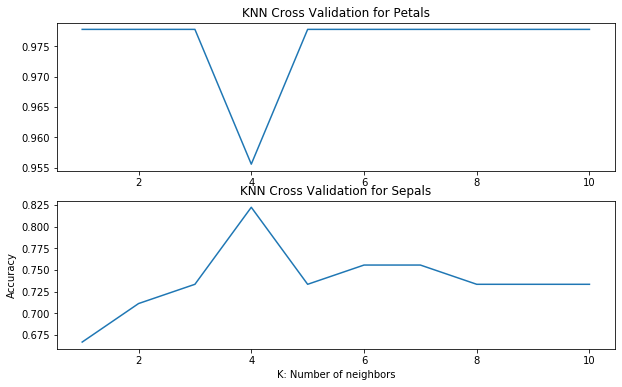

In [56]:
index_p = list(range(1,11))
a_p = pd.Series()
a_s = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in list(range(1,11)):
    knn_p = KNeighborsClassifier(n_neighbors = i)
    knn_p.fit(train_x_p, train_y_p)
    preds_p = knn_p.predict(test_x_p)
    a_p = a_p.append(pd.Series(metrics.accuracy_score(preds_p, test_y_p)))

for i in list(range(1,11)):
    knn_s = KNeighborsClassifier(n_neighbors = i)
    knn_s.fit(train_x_s, train_y_s)
    preds_s = knn_s.predict(test_x_s)
    a_s = a_s.append(pd.Series(metrics.accuracy_score(preds_s, test_y_s)))

f , ax = plt.subplots(2, figsize = (10,6))
ax[0].plot(index, a_p)
ax[0].set_title("KNN Cross Validation for Petals")
ax[1].plot(index, a_s)
ax[1].set_title("KNN Cross Validation for Sepals")
plt.xlabel("K: Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

# Let's do Cross Validation on our two methods of training

In [72]:
y_ = df_iris["species"]
x_s = df_iris[['sepal_length', 'sepal_width']] 

kfold = KFold(n_splits = 10) 

mean_s = []
accuracy_s = []
std_s = []

classifiers_s = ['SVM', 'Logistic Regression', 'Decision Tree', 'KNN']
models_s = [svm.SVC(), LogisticRegression(solver = 'lbfgs', max_iter = 1000), DecisionTreeClassifier(), 
          KNeighborsClassifier(n_neighbors = 3)]

for i in models_s:
    model_s = i
    cv_result_s = cross_val_score(model_s, x_s, y, cv = kfold, scoring = "accuracy")
    cv_result_s = cv_result_s
    mean_s.append(cv_result_s.mean())
    std_s.append(cv_result_s.std())
    accuracy_s.append(cv_result_s)
    
cv_models_results_s = pd.DataFrame({'CV Mean':mean_s, 'Std':std_s},index = classifiers_s)       

In [98]:
y_ = df_iris["species"]
x_p = df_iris[['petal_length', 'petal_width']]

mean_p = []
accuracy_p = []
std_p = []

classifiers_p = ['SVM', 'Logistic Regression', 'Decision Tree', 'KNN']
models_p = [svm.SVC(), LogisticRegression(solver = 'lbfgs', max_iter = 1000), DecisionTreeClassifier(), 
          KNeighborsClassifier(n_neighbors = 3)]

for i in models_p:
    model_p = i
    cv_result_p = cross_val_score(model_p, x_p, y, cv = kfold, scoring = "accuracy")
    cv_result_p = cv_result_p
    mean_p.append(cv_result_p.mean())
    std_p.append(cv_result_p.std())
    accuracy_p.append(cv_result_p)
    
cv_models_results_p = pd.DataFrame({'CV Mean':mean_p, 'Std':std_p},index = classifiers_p)       

cv_models_results_full = pd.DataFrame({'Petal CV Mean': mean_p, 'Sepal CV Mean':mean_s, 
                                   'Petal/Sepal Std': std_p},index = classifiers_p)
cv_models_results_full

,Petal CV Mean,Sepal CV Mean,Petal/Sepal Std
SVM,0.946667,0.720000,0.058119
Logistic Regression,0.946667,0.706667,0.058119
Decision Tree,0.920000,0.613333,0.118509
KNN,0.953333,0.660000,0.060000


# Let's review our model accuracy with a confusion matrix

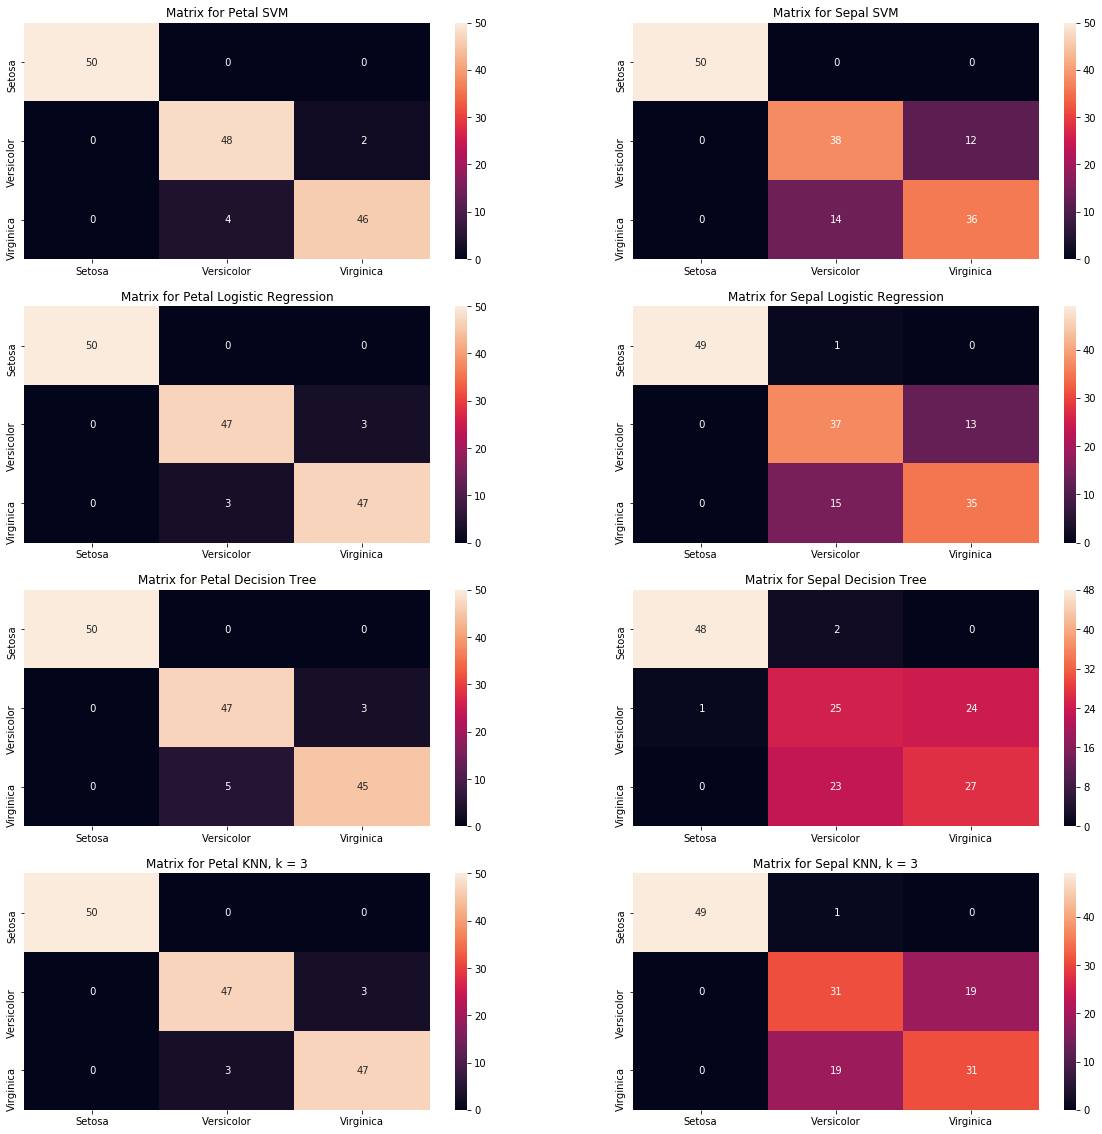

In [86]:
f, ax = plt.subplots(4,2, figsize = (20, 20))

# svm
y_pred1_p = cross_val_predict(svm.SVC(), x_p, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred1_p), xticklabels = x_label, yticklabels = y_label, 
            ax = ax[0, 0], annot = True, fmt = '2.0f')
ax[0, 0].set_title('Matrix for Petal SVM')

y_pred1_s = cross_val_predict(svm.SVC(), x_s, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred1_s), xticklabels = x_label, yticklabels = y_label, 
            ax = ax[0, 1], annot = True, fmt = '2.0f')
ax[0, 1].set_title('Matrix for Sepal SVM')

#logreg
y_pred2_p = cross_val_predict(LogisticRegression(solver = 'lbfgs', max_iter = 1000), x_p, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred2_p), xticklabels = x_label, yticklabels = y_label, 
            ax = ax[1, 0], annot = True, fmt = '2.0f')
ax[1, 0].set_title('Matrix for Petal Logistic Regression')

y_pred2_s = cross_val_predict(LogisticRegression(solver = 'lbfgs', max_iter = 1000), x_s, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred2_s), xticklabels = x_label, yticklabels = y_label, 
            ax = ax[1, 1], annot = True, fmt = '2.0f')
ax[1, 1].set_title('Matrix for Sepal Logistic Regression')

#dectree
y_pred3_p = cross_val_predict(DecisionTreeClassifier(), x_p, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred3_p), xticklabels = x_label, yticklabels = y_label,
            ax = ax[2, 0], annot = True, fmt = '2.0f')
ax[2, 0].set_title('Matrix for Petal Decision Tree')

y_pred3_s = cross_val_predict(DecisionTreeClassifier(), x_s, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred3_s), xticklabels = x_label, yticklabels = y_label,
            ax = ax[2, 1], annot = True, fmt = '2.0f')
ax[2, 1].set_title('Matrix for Sepal Decision Tree')

#knn
y_pred4_p = cross_val_predict(KNeighborsClassifier(n_neighbors = 3), x_p, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred4_p), xticklabels = x_label, yticklabels = y_label,
            ax = ax[3, 0], annot = True, fmt = '2.0f')
ax[3, 0].set_title('Matrix for Petal KNN, k = 3')

y_pred4_s = cross_val_predict(KNeighborsClassifier(n_neighbors = 3), x_s, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred4_s), xticklabels = x_label, yticklabels = y_label,
            ax = ax[3, 1], annot = True, fmt = '2.0f')
ax[3, 1].set_title('Matrix for Sepal KNN, k = 3')

plt.show()

### The confusion matrix for Petals is on the left and Sepals on the right. Using Petals instead over Sepals provided slightly better accuracy in classifying Setosa. Yet, a drastic shift in accuracy is clear in the classification models for Versicolor and Virginica when using sepals. Each model has high rates of false positives for both Versicolor and Virginica, with the lowest for SVM.

### It is clear that classifying using Petal features is far more accurate than Sepal features. This is partly due to the fact that petal length and width are highly correlated, whereas sepal length and width are not. 